<div align=center>

<br/>
<font size=4>
        <b>
        In the Name of God
    </b>
    </font>
    <br/>
    <br/>
    <font align=center size=5>
        <br/>
        Project
        <br/><br/>
        <font color=blue size=5>
            Face Recognition
        </font>
        <br/>
        <br/>
    </font>
    <hr/>
    <font size=4>
         Supervisor: Dr. Mazlaghani
        <br/>
        <br/>
        <br/>
        By: Razieh Darshi
        <br/>
        <br/>
        <br/>
        Winter 2023
        <br/>
        <br/>
    </font>
    <br/>
    <br/>
    <br/>
</div>

<div dir="rtl">
    <h1>
        تشخیص چهره
    </h1>
</div>

<div dir="rtl" style="font-size:18px"> 
    در الگوریتم‌های تشخیص چهره، درون عکس‌ها به دنبال تشخیص خصوصیت‌های خاص عکس بودند. به طور مثال چشم، بینی و ...
     که می‌توانست حاکی از وجود چهره در عکس باشند. واضح است که چنین روش‌هایی هزینه‌بر و در موارد زیادی نادقیق هستند.
    <br/>
    <br/>
    در این پروژه به دنبال پیاده سازی روشی هستیم که بتوانیم این تشخیص را با استفاده از مفاهیم آموخته شده به نحو موثری انجام دهیم.
    </div>

## Load Data (10 points)



<br/>

<div dir="rtl" style="font-size:18px">
    قبل از اینکه درباره پیاده‌سازی این الگوریتم صحبت کنیم لازم است داده‌هایی که مورد استفاده قرار می‌دهیم را داشته باشیم.
    داده‌های مورد نظر در زیپ مربوطه همراه این نوتبوک قرار گرفته‌است.
    <br/>
    دقت کنید که این دیتاست شامل تصاویر مربوط به چهره 200 فرد است.
    هر کدام از افراد دو عکس یکی حالت طبیعی و یکی خندان دارند.
    پس در کل 400 عکس داریم.
    ابتدا تمام عکس‌ها را لود کنید و داشته باشید که در ادامه به آن‌ها نیاز پیدا می‌کنید.
    <br/>
    <br/>
    در نهایت برای این که مطمئن شوید که دیتا را درست لود کرده‌اید،
    به طور رندوم 5 تا از این چهره‌ها را در دو حالت خندان و عادی نمایش دهید. برای اینکار میتوانید از تابع imshow از لایبرری matplotlib استفاده کنید.
    <br/>
</div>

119a.jpg
129a.jpg
155a.jpg
13a.jpg
179a.jpg
24b.jpg
46b.jpg
132b.jpg
22b.jpg
74b.jpg


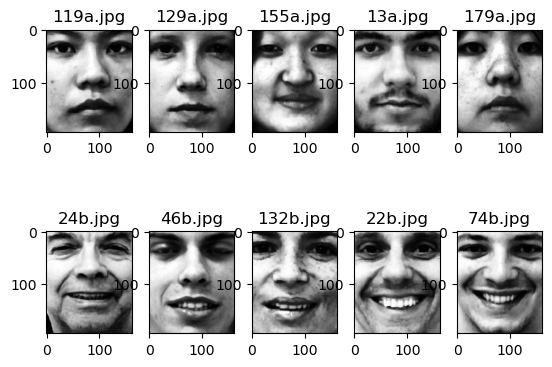

In [1]:
import os
import random
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

test_folder=r'F:\data_science\a'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=cv2.imread(image_path)
    ax=plt.subplot(2,5,i+1)
    print(file)
    ax.title.set_text(file)
    plt.imshow(img)
    
#print(img.shape)
test_folder1=r'F:\data_science\b'
for i in range(5):
    file = random.choice(os.listdir(test_folder1))
    image_path= os.path.join(test_folder1, file)
    #print(image_path)
    img1=cv2.imread(image_path)
    ax=plt.subplot(2,5,i+1+5)
    print(file)
    ax.title.set_text(file)
    plt.imshow(img1)



<br/>
<div dir="rtl" style="font-size:18px">
حال فعلا تنها با عکس‌های چهره طبیعی کار داریم.
    190 تا عکس اول از آن را در نظر بگیرید
     هر کدام را به صورت یک وکتور تک بعدی $\Gamma_i$ در بیاورید.
     در نهایت ماتریس حاصل از داده‌ها که $\Gamma$ است
    را تشکیل دهید. دقت کنید که ستون $i$ ام این ماتریس
    $\Gamma_i$ است.
    <br/>
<div/>

In [2]:
import numpy as np

file_list = os.listdir(test_folder)
#print(file_list)

num_images = 190

vectors = []

for i in range(num_images):
    
    image_path = os.path.join(test_folder, file_list[i])
    image = cv2.imread(image_path)
    image1=image[:,:,0].copy()
    height1, width1= image1.shape
    vector=image1.reshape((image1.shape[0]*image1.shape[1]))
    vectors.append(vector)
vectors=np.array(vectors)
gama=np.transpose(vectors)
gama=np.array(gama)
print(gama.shape)
#print(gama)

(31266, 190)


# PCA 
<br/>
<br/>

<div dir="rtl" style="font-size:18px">
 <br/>
    الگوریتم Principal Component Analysis یا همان PCA یک روش برای کاهش ابعاد داده‌ی موردنظر است که در حوزه یادگیری ماشین و علوم داده کاربرد فراوان دارد.
با کاهش ابعاد سادگی را افزایش داده و در عین حال همانگونه که انتظار می‌رود ورودی با کاهش دقت همراه خواهد شد. در الگوریتم PCA تلاش بر این است که در عین کاهش ابعاد، کمترین میزان اطلاعات را از دست بدهیم.
    پیشنهاد می‌شود قبل از انجام پروژه مطالعات بیشتری در رابطه با این الگوریتم داشته باشید.
<br/>
    <br/>
در ادامه‌ی بخش‌ها می‌خواهیم PCA را پیاده سازی کنیم.
گفتیم که برای تشخیص چهره‌ها به دنبال پیدا کردن مشخصه‌های خاص درون هر عکس هستیم. این مشخصه‌ها ممکن است ترکیبی از چندویژگی درون عکس باشند، یا حتی ویژگی‌هایی 
    باشند که به طور طبیعی قادر به تشخیص آنها نیستیم.
    در اینجا با استفاده از الگوریتم PCA در تلاش برای پیدا کردن همچین ویژگی‌هایی هستیم.
    <br/>
    <br/>
با PCA قرار است کار زیر را انجام دهیم :
    <br/>
    <br/>
فرض کنید هر عکس به صورت یک آرایه دو بعدی $N\times M$ باشد ، بنابراین هر عکس را می‌توان با یک بردار به طول $N\times M$ نشان دهیم، پس در یک فضای $N\times M$ بعدی قرار دارد. فرض کنید $W$ فضایی باشد که تمامی عکس‌های صورت در آن قرار دارند ، اسم آن را Face Space بگذارید. در اینجا به دنبال پیدا کردن K بردار عمود بر هم هستیم که فضای $W$ را Span می‌کنند.
    <div/>

## Mean image (5 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت برای نرمالایز کردن نیاز به 
    mean image
    داریم.
    آن را بدست آورید و تصویر آن را نمایش هم دهید.
    $$
    \Psi = \frac{1}{n}\sum_{i = 1}^{n} \Gamma_i
    $$
     در اینجا $n$ تعداد داده های شماست.
     دقت کنید فعلا کل کار ما بر روی 190 عکس چهره طبیعی است.
<div/>

31266 190
(193, 162) (31266,)


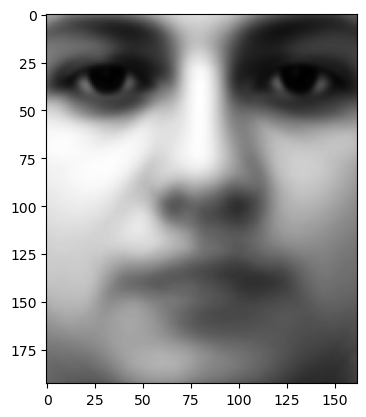

In [3]:
m,n= gama.shape
print(m,n)
mean1=np.zeros(m)
for i in range(0,n):
    mean1=gama[:,i]+mean1

mean1=mean1/(n)
mean1_mat=np.reshape(mean1,(height1,width1))
print(mean1_mat.shape, mean1.shape)

plt.imshow(mean1_mat,cmap='gray')

## Cov Matrix (15 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت باید ماتریس کوواریانس را به صورت زیر تعریف کنید :
    <br/>
    $$
    \Phi_i = \Gamma_i - \Psi
    $$
    <br/>
    $$
    A = [ \Phi_1 \Phi_2 \dots \Phi_n ]
    $$
    <br/>
    $$
    C = A A^T
    $$
    <br/>
    حال بردار ویژه های ماتریس $C$ به ترتیب بزرگی مقدار ویژه های متناظرشان ، Principal Components هایی هستند که ما می‌خواهیم.
    <br/>
    دقت کنید که ماتریس $C$ ماتریسی $N^2\times N^2$ می‌باشد ، سعی کنید روش بهینه ای برای پیدا کردن بردار ویژه های آن پیاده سازی کنید.
    به عنوان راهنمایی از 
    $A^T A$
    کمک بگیرید.
    <br/>
    مقدار این مقادیر ویژه را سورت کنید و درون یک نمودار نشان دهید. 
    <br/>
    بعد از سورت کردن مقدار ویژه‌ها ، بردار ویژه متناظر با 5 مقدار ویژه اول را بکشید.
    این بردار‌های ویژه را eigen face می‌نامیم.
    <br/>
     در نهایت با کمی مطالعه معیاری را انتخاب کنید و تعداد مورد نیاز از Principal Component
     ها از نظرتان را مشخص نمایید و آن تعداد بردار ویژه را انتخاب کنید.
     این عدد را K در نظر بگیرید.
     همچنین ماتریس شامل PCها را U در نظر بگیرید.
    <br/>
<div/>

In [4]:
A=[]
for i in range(0,n):
    A.append((gama[:,i]-mean1))
print(gama[:,i].shape,mean1.shape)
A=np.transpose(A)
print(A.shape)
C=np.dot(A,np.transpose(A))
print(C.shape)

(31266,) (31266,)
(31266, 190)
(31266, 31266)


In [5]:
from numpy.linalg import eigh
Cprime=np.dot(np.transpose(A),A)
vals, vecs = eigh(Cprime)
print(vals.shape,vecs.shape)

(190,) (190, 190)


In [6]:
if round(sum(np.dot(Cprime,vecs[:,1])-vals[1]*vecs[:,1]))==0:

    print("ok")
#print(np.dot(Cprime,vecs[:,1]))
#print(vals[1]*vecs[:,1])

ok


[1.44755215e+09 7.14791621e+08 6.19112361e+08 5.83974546e+08
 4.93402097e+08]


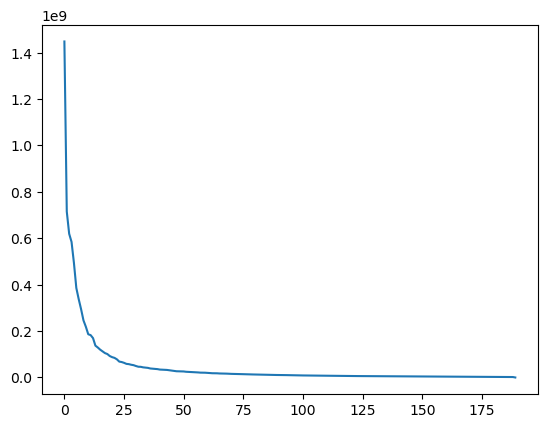

In [7]:
#print(type(vals))
vals1=vals[::-1]
print(vals1[0:5])
plt.plot(vals1)

In [8]:

index1=np.linspace(n-1,0,n)
index1=index1.astype(int)
vecs1=vecs[:,index1]
print(vecs1.shape)
vecs1=np.dot(A,vecs1)
print(vecs1.shape)
print(vecs1[:,0:5])
#checking the result
if round(sum(np.dot(C,vecs1[:,1])-vals1[1]*vecs1[:,1]))==0:

    print("ok")
#print(np.dot(C,vecs1[:,1]))
#print(vals1[1]*vecs1[:,1])

(190, 190)
(31266, 190)
[[ 127.14503421 -113.45945405 -381.81773598 -386.8551776    10.20374514]
 [ 152.44422326 -102.37435599 -358.21897098 -430.8642834    23.04644135]
 [ 134.25091984  -93.19743973 -343.98003803 -481.07393986   28.58078242]
 ...
 [-170.21467387  -76.1920399  -493.67875693 -144.1846594    77.12409105]
 [-183.72168835  -70.03488665 -498.12408997 -133.51167435   63.39147192]
 [-198.79647489  -59.19560031 -503.44947898 -135.10260972   66.1422517 ]]
ok


In [9]:
#for 2d data k is better to select 2
#با توجه به اینکه در فضای دوبعدی هستیم پیشنهاد میشود مقدار این متغیر 2 انتخاب شود
K=2
U=vecs1[:,0:K]
#U.shape

In [10]:
print(np.mean(vecs1[:,1]))
from numpy import linalg as LA
print(LA.norm(vecs[:,1]))
print(LA.norm(vecs1[:,1]))

-0.2702577313640699
1.0
26735.587155515554


In [11]:
#نکته بسیار: با توجه به اینکه نرم بردار ویژه بیشتر از یک هست باید حتما نرمالیزه کنیم. درغیر اینصورت جواب قابل قبولی نمیگیریم. به همین دلیل در ادامه بردار ویژه را نرمالیزه کرده ایم
vecs1_n=vecs1.copy()
for i in range(0,vecs1.shape[1]):
    vecs1_n[:,i]=vecs1[:,i]/LA.norm(vecs1[:,i])

print(LA.norm(vecs1_n[:,189]))       

1.0


## Reconstruction images (20 points)

<div dir="rtl" style="font-size:18px">
    در این قسمت قرار است که تابعی بنویسید که عکسی را به همراه
    Principal Components
    ‌های مورد نظر بگیرد و آن را دوباره با آن PC‌ها بازسازی کند.
    برای نحوه‌ی انجام این کار از روابط زیر کمک بگیرید.
    <br/>
    $$W = U^T(\Gamma - \Psi)$$
    $$rec = UW + \Psi$$
    <br/>
    دقت کنید که $\Gamma$
    این‌جا عکس ورودی است.
<div/>

<div dir="rtl" style="font-size:18px">
    
<div/>

In [12]:
def reconstruct_image(orig, U):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    
    """
    

#     mean2=np.mean(orig)
#     mean3=mean2*np.ones(orig.shape)
#     mean3=0
    W=np.dot(np.transpose(U),(orig-mean1))
    recon =np.dot(U,W)+mean1
    recon_min=np.min(recon)
    recon_max=np.max(recon)
    recon=recon-recon_min
    recon=recon*255/(recon_max-recon_min)
    mse = np.sum((orig-recon)**2)/orig.size
    #mse2= np.square(recon - orig).sum().mean()
    # todo
    return recon, mse

<div dir="rtl" style="font-size:18px">
    )بخش ب(
    <br/>
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید.
    برای آن عکس به ازای تمام حالت‌های انتخاب K عملیات بازسازی را انجام دهید.
    <br/>
    کمترین و بیشترین MSE را به دست آورید.
    <br/>
    MSE را برای Kای که در قسمت قبل انتخاب کردید محاسبه نمایید.
    <br/>
    سپس نمودار 
    MSE-number of largest principal components
    را رسم کنید.
    <br/>
    در مرحله‌ی بعد برای یک عکس رندم دیگر از دیتاست، عکس اصلی را همراه عکس‌هایی که از بازسازی با در نظر گرفتن 
    5 انتخاب مختلف برای K که کل محدوده تعداد 
    eigen face‌ها را پوشش دهد، 
    رسم کنید.
    <br/>
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
<div/>

orig shape: (31266,)
(31266,) (31266, 188) (31266,)


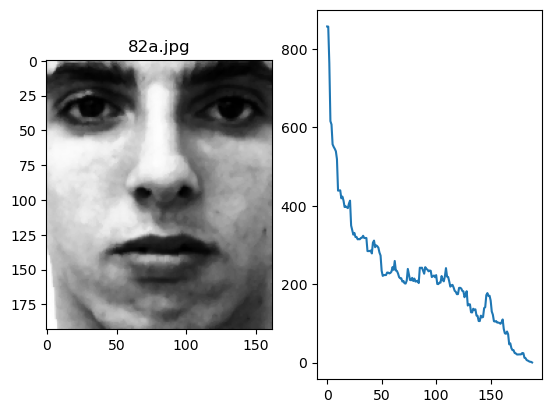

In [15]:
file_list = os.listdir(test_folder)
i=random.randint(1,190)
#print(i)
image_path = os.path.join(test_folder, file_list[i])
image = cv2.imread(image_path)
ax=plt.subplot(1,2,1)
ax.title.set_text(file_list[i])
plt.imshow(image)
image1=image[:,:,0].copy()
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
print('orig shape:',vector.shape)

orig=vector
mse_vec=[]
print(orig.shape,U.shape,mean1.shape)
for i in range(0,189):
    K=i
    U=vecs1_n[:,0:K]
    recon, mse=reconstruct_image(orig, U)
    mse_vec.append(mse)
ax=plt.subplot(1,2,2)
plt.plot(mse_vec)
#for i in range(1,10):

In [21]:
print(mse_vec[2])
print(mse_vec[0])

763.8020310445037
857.8697254408437


توضیح: همانطور که مشاهده میشود کمترین مقدار خطا صفر است وزمانی اتفاق می افتد که تعداد متغیر کا یا همان تعداد بردارهای ویژه برابر با 190 باشد و بیشترین میزان خطا مقدار 857 می باشد و زمانی رخ می دهد که کا برابر یک باشد.
انتخاب قبلی کا برابر 2 بود که میزان خطا 763 می باشد

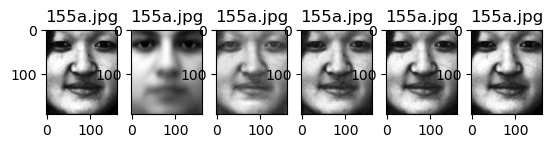

In [22]:
file_list = os.listdir(test_folder)
i=random.randint(1,190)
image_path = os.path.join(test_folder, file_list[i])
image = cv2.imread(image_path)
ax=plt.subplot(1,6,1)
ax.title.set_text(file_list[i])
plt.imshow(image)
image1=image[:,:,0].copy()
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
orig=vector
range1=np.linspace(0,180,5)
po=1
for ii in range1:
    U=vecs1_n[:,0:int(ii)]
    recon, mse=reconstruct_image(orig, U)
    #print(recon.shape,mse)
    new1 = np.reshape(recon, (height1, width1))
    po+=1
    ax=plt.subplot(1,6,po)
    ax.title.set_text(file_list[i])
    #print('max',np.max(new1))
    plt.imshow(new1,cmap="gray")

نتیجه گیری: طبیعی است وقتی تعداد بردارهای ویژه که فضای تصویر را پوشش می دهد افزایش می یابد تصویر ما به تصویر اولیه نزدیک تر می شود و بازسازی از تصویر کاملتر می شود. درحالی که فقط یک بردار ویژه درنظرگرفته شده است تصویر ما به تصویر میانگین نزدیک تر است. اما در حالتی که تمام بردارهای ویژه درنظر گرفته شده است تصویر ما کاملا شبیه تصویر اولیه است و میزان خطا نیز صفر شده است 

##  Smiling  images (10 points)

<div dir="rtl" style="font-size:18px">
    حال این بار تمام کار‌هایی که در بخش قبل )بخش ب( انجام دادید را تکرار کنید. 
    ولی این بار به جای عکس‌های رندم از چهره‌های عادی، عکس رندم از چهره‌های خندان انتخاب کنید.
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
    به نظرتان دلایل تفاوت خروجی‌ها در هر قسمت نسبت به قسمت قبل چیست؟
<div/>

189
(31266,) (31266, 180) (31266,)


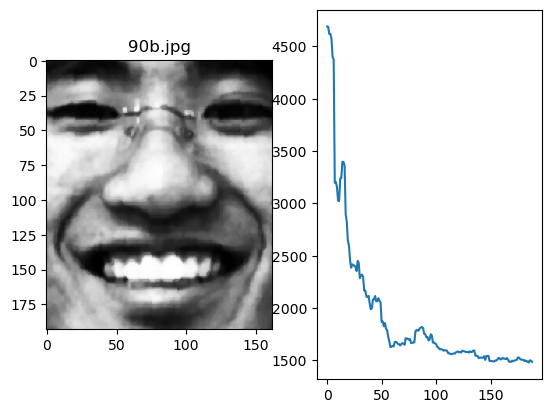

In [23]:

file_list = os.listdir(test_folder1)
i=random.randint(1,190)
print(i)
image_path = os.path.join(test_folder1, file_list[i])
image = cv2.imread(image_path)

ax=plt.subplot(1,2,1)
ax.title.set_text(file_list[i])
plt.imshow(image)
image1=image[:,:,0].copy()
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
orig=vector
mse_vec=[]
print(orig.shape,U.shape,mean1.shape)
for i in range(0,189):
    K=i
    U=vecs1_n[:,0:K]
    recon, mse=reconstruct_image(orig, U)
    mse_vec.append(mse)
ax=plt.subplot(1,2,2)
plt.plot(mse_vec)

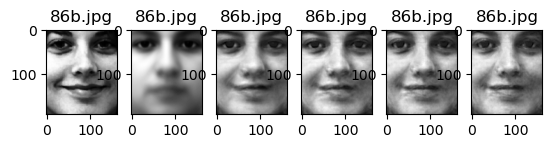

In [24]:
file_list = os.listdir(test_folder1)
i=random.randint(1,190)
image_path = os.path.join(test_folder1, file_list[i])
image = cv2.imread(image_path)
ax=plt.subplot(1,6,1)
ax.title.set_text(file_list[i])
plt.imshow(image)
image1=image[:,:,0].copy()
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
orig=vector
range1=np.linspace(0,180,5)
po=1
for ii in range1:
    U=vecs1_n[:,0:int(ii)]
    recon, mse=reconstruct_image(orig, U)
    #print(recon.shape,mse)
    new1 = np.reshape(recon, (height1, width1))
    po+=1
    ax=plt.subplot(1,6,po)
    ax.title.set_text(file_list[i])
    #print('max',np.max(new1))
    plt.imshow(new1,cmap="gray")

نتیجه گیری: در این قسمت مانند قسمت قبل با افزایش تعداد بردارهای ویژه مقدار خطا کمتر شده است اما صفر نشده است. همچنین رنج خطا نسبت به حالت قبل به مقدار قابل توجهی افزایش یافته است زیرا بردارهای ویژه مورد استفاده مربوط به عکس های طبیعی می باشد و فضای مربوط به تصاویر خندان را پوشش نمی دهد. به همین دلیل حتی با افزایش بردار ویژه تصویر بصورت کامل بازسازی نشده است

## Reconstruction of test set (10 points)


<div dir="rtl" style="font-size:18px">
تا به اینجای کار ما با محاسبه MSE و بازسازی دوباره  عکس‌ها به  شهودی عددی و بصری از دقت فضای جدید یا همان  face space خود رسیدیم. اما نمی‌توان از این نکته چشم‌پوشی کرد که ارزیابی‌های ما از فضای جدید با استفاده از عکس‌هایی انجام شده که با آنها face space را ساخته‌ایم. در نتیجه این ارزیابی ما به نوعی biased است. برای ارزیابی بهتر MSE را بر روی تعدادی عکس که الگوریتم آنها را تا به حال ندیده است انجام داده و آنها را بازسازی می‌کنیم.
    <br/>
    در این قسمت یک عکس از ۱۰ عکس دیده نشده حالت طبیعی را انتخاب نموده و کارهای بخش ب را بر روی آن پیاده کنید. ارزیابی چه تفاوتی کرده است؟ نتیجه‌گیری کنید.
    <br/>
<div/>

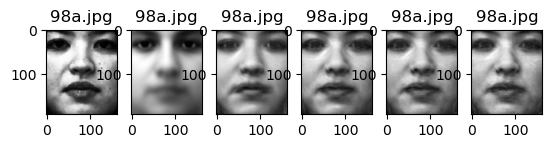

In [30]:
file_list = os.listdir(test_folder)
i=random.randint(191,199)
image_path = os.path.join(test_folder, file_list[i])
image = cv2.imread(image_path)
ax=plt.subplot(1,6,1)
ax.title.set_text(file_list[i])
plt.imshow(image)
image1=image[:,:,0].copy()
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
orig=vector
range1=np.linspace(0,180,5)
po=1
mse_vec=[]
for ii in range1:
    U=vecs1_n[:,0:int(ii)]
    recon, mse=reconstruct_image(orig, U)
    #print(recon.shape,mse)
    new1 = np.reshape(recon, (height1, width1))
    po+=1
    ax=plt.subplot(1,6,po)
    ax.title.set_text(file_list[i])
    #print('max',np.max(new1))
    plt.imshow(new1,cmap="gray")
for i in range(0,190):
    K=i
    U=vecs1_n[:,0:K]
    recon, mse=reconstruct_image(orig, U)
    mse_vec.append(mse)



471.05536033364854

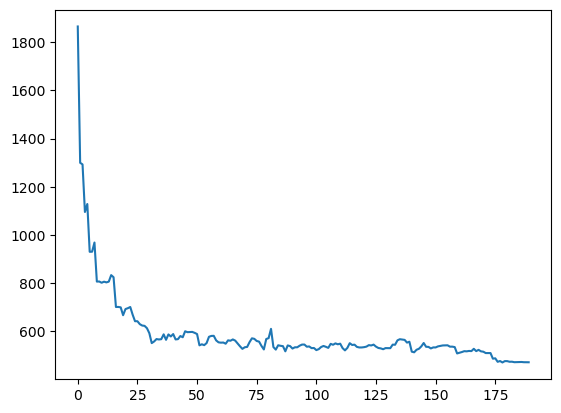

In [31]:
plt.plot(mse_vec)
mse_vec[189]

نتیجه گیری: در این قسمت با توجه به این که بردارهای ویژه مربوط به این فضای تصویر نمی باشد خطا نسبت به داده های اموزش بیشتر شده است و حتی با افزایش بردار وِیژه خطا صفر نشده است. اما در این قسمت خطا بصورت قابل توجهی نسبت به تصاویر خندان بهتر شده است. اگرچه هر دوتصاویر خندان و تصاویر مربوط به داده های تست خارج از فضای  تصاویر اموزش داده شده است اما تصاویر عادی عملکرد بهتری داشته است زیرا فضای بردار ویژه ان به فضای بردار ویژه تصاویر اموزش داده شده بسیار نزدیک است  

## Reconstruction of non-human image (10 points)

<div dir="rtl" style="font-size:18px">
دو عکس غیر از چهره انسان و به دلخواه خود )مثل عکس ماشین یا پرنده( را در نظر گرفته.
    نخست عملیات‌های لازم مثل سیاه سفید کردن یا تغییر سایز را انجام دهید.
    سپس با استفاده از تمام PCها 
    سعی بر بازسازی آن داشته باشید و MSE را محاسبه نمایید.
    <br/>
    آیا الگوریتم به اندازه عکس چهره‌ها موفق عمل کرد؟‌ چرا؟ نتیجه‌گیری کنید.
    <br/>
<div/>

(1700, 1556)
(193, 162)


C:\Users\razie\AppData\Local\Temp\ipykernel_1420\686825344.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(1,7,1)


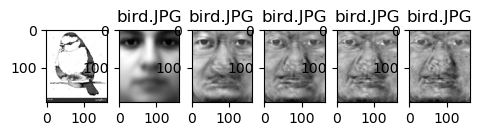

In [33]:
test_folder3=r'F:\data_science'
file="bird.JPG"
image_path= os.path.join(test_folder3, file)
image=cv2.imread(image_path)
image = cv2. cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')
print(image.shape)
#new1 = img.resize(height1, width1)
new2=cv2.resize(image,( width1,height1,))
#ax=plt.subplot(2,7,1)
ax.title.set_text(file)
ax=plt.subplot(1,7,1)
plt.imshow(new2,cmap='gray')
print(new2.shape)
image1=new2
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
orig=vector
range1=np.linspace(0,180,5)
po=1
mse_vec=[]
for ii in range1:
    U=vecs1_n[:,0:int(ii)]
    recon, mse=reconstruct_image(orig, U)
    #print(recon.shape,mse)
    new1 = np.reshape(recon, (height1, width1))
    po+=1
    ax=plt.subplot(1,7,po)
    ax.title.set_text(file)
    #print('max',np.max(new1))
    plt.imshow(new1,cmap="gray")
for i in range(0,189):
    K=i
    U=vecs1_n[:,0:K]
    recon, mse=reconstruct_image(orig, U)
    mse_vec.append(mse)


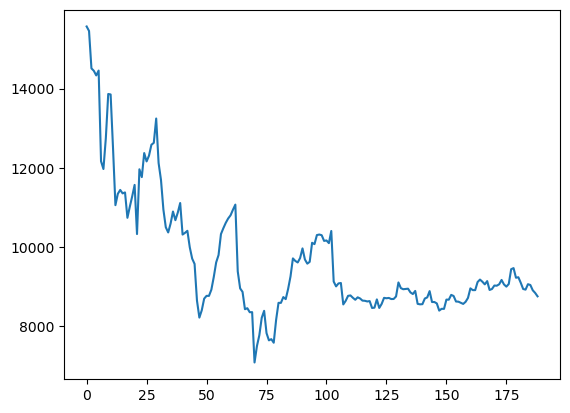

In [35]:

plt.plot(mse_vec)

(151, 215)
(193, 162)


C:\Users\razie\AppData\Local\Temp\ipykernel_1420\2418083289.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(1,6,1)


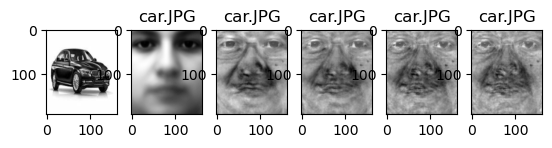

In [37]:
test_folder3=r'F:\data_science'
file="car.JPG"
image_path= os.path.join(test_folder3, file)
image=cv2.imread(image_path)
image = cv2. cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')
print(image.shape)
#new1 = img.resize(height1, width1)
new2=cv2.resize(image,( width1,height1))
#ax=plt.subplot(2,7,1)
ax.title.set_text(file)
ax=plt.subplot(1,6,1)
plt.imshow(new2,cmap='gray')
print(new2.shape)
image1=new2
vector=image1.reshape((image1.shape[0]*image1.shape[1]))
orig=vector
range1=np.linspace(0,180,5)
po=1
mse_vec=[]
for ii in range1:
    U=vecs1_n[:,0:int(ii)]
    recon, mse=reconstruct_image(orig, U)
    #print(recon.shape,mse)
    new1 = np.reshape(recon, (height1, width1))
    po+=1
    ax=plt.subplot(1,6,po)
    ax.title.set_text(file)
    #print('max',np.max(new1))
    plt.imshow(new1,cmap="gray")
for i in range(0,189):
    K=i
    U=vecs1_n[:,0:K]
    recon, mse=reconstruct_image(orig, U)
    mse_vec.append(mse)


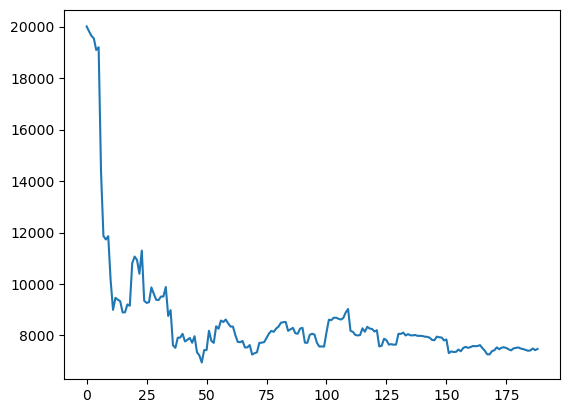

In [38]:
plt.plot(mse_vec)

نتیجه گیری: در اینجا میزان خطا نسبت به بخش های قبلی بسیار افزایش یافته است و الگوریتم نتوانسته است تصاویر را بازسازی کند. زیرا فضای مربوط به بردارهای ویژه تصاویر اموزش داده شده بسیار متفاوت از فضای بردار ویژه مجموعه تصاویر پرنده و ماشین است. 

## Image Rotation (10 points)

<div dir="rtl" style="font-size:18px">
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید. برای آن عکس تمام rotationهای ممکن
    )از 0 تا 360( را انجام دهید.
    حال روی هر یک از عکس‌های بدست آمده با استفاده از تمام PCها عملیات بازسازی و محاسبه‌ی MSE را انجام دهید.
    <br/>
    نمودار MSE بر حسب درجه‌ی چرخش را رسم کنید.
    <br/>
    برای 10 درجه به صورت یکنواخت بین 360 و 0، عکس اصلی، عکس بعد از دوران، عکس بازسازی‌شده به کمک الگوریتم را رسم کنید.
    <br/>
    نتایج به دست آمده را تحلیل کنید. آیا MSE در حالت 360 درجه دوران با حالت 0 برابر است؟
    چرا؟
    <br/>
    <br/>
    <font color=blue>
    با استفاده از ndimage میتوانید عکس های خود را بچرخانید.
        <font/>
        <br/>
<div/>

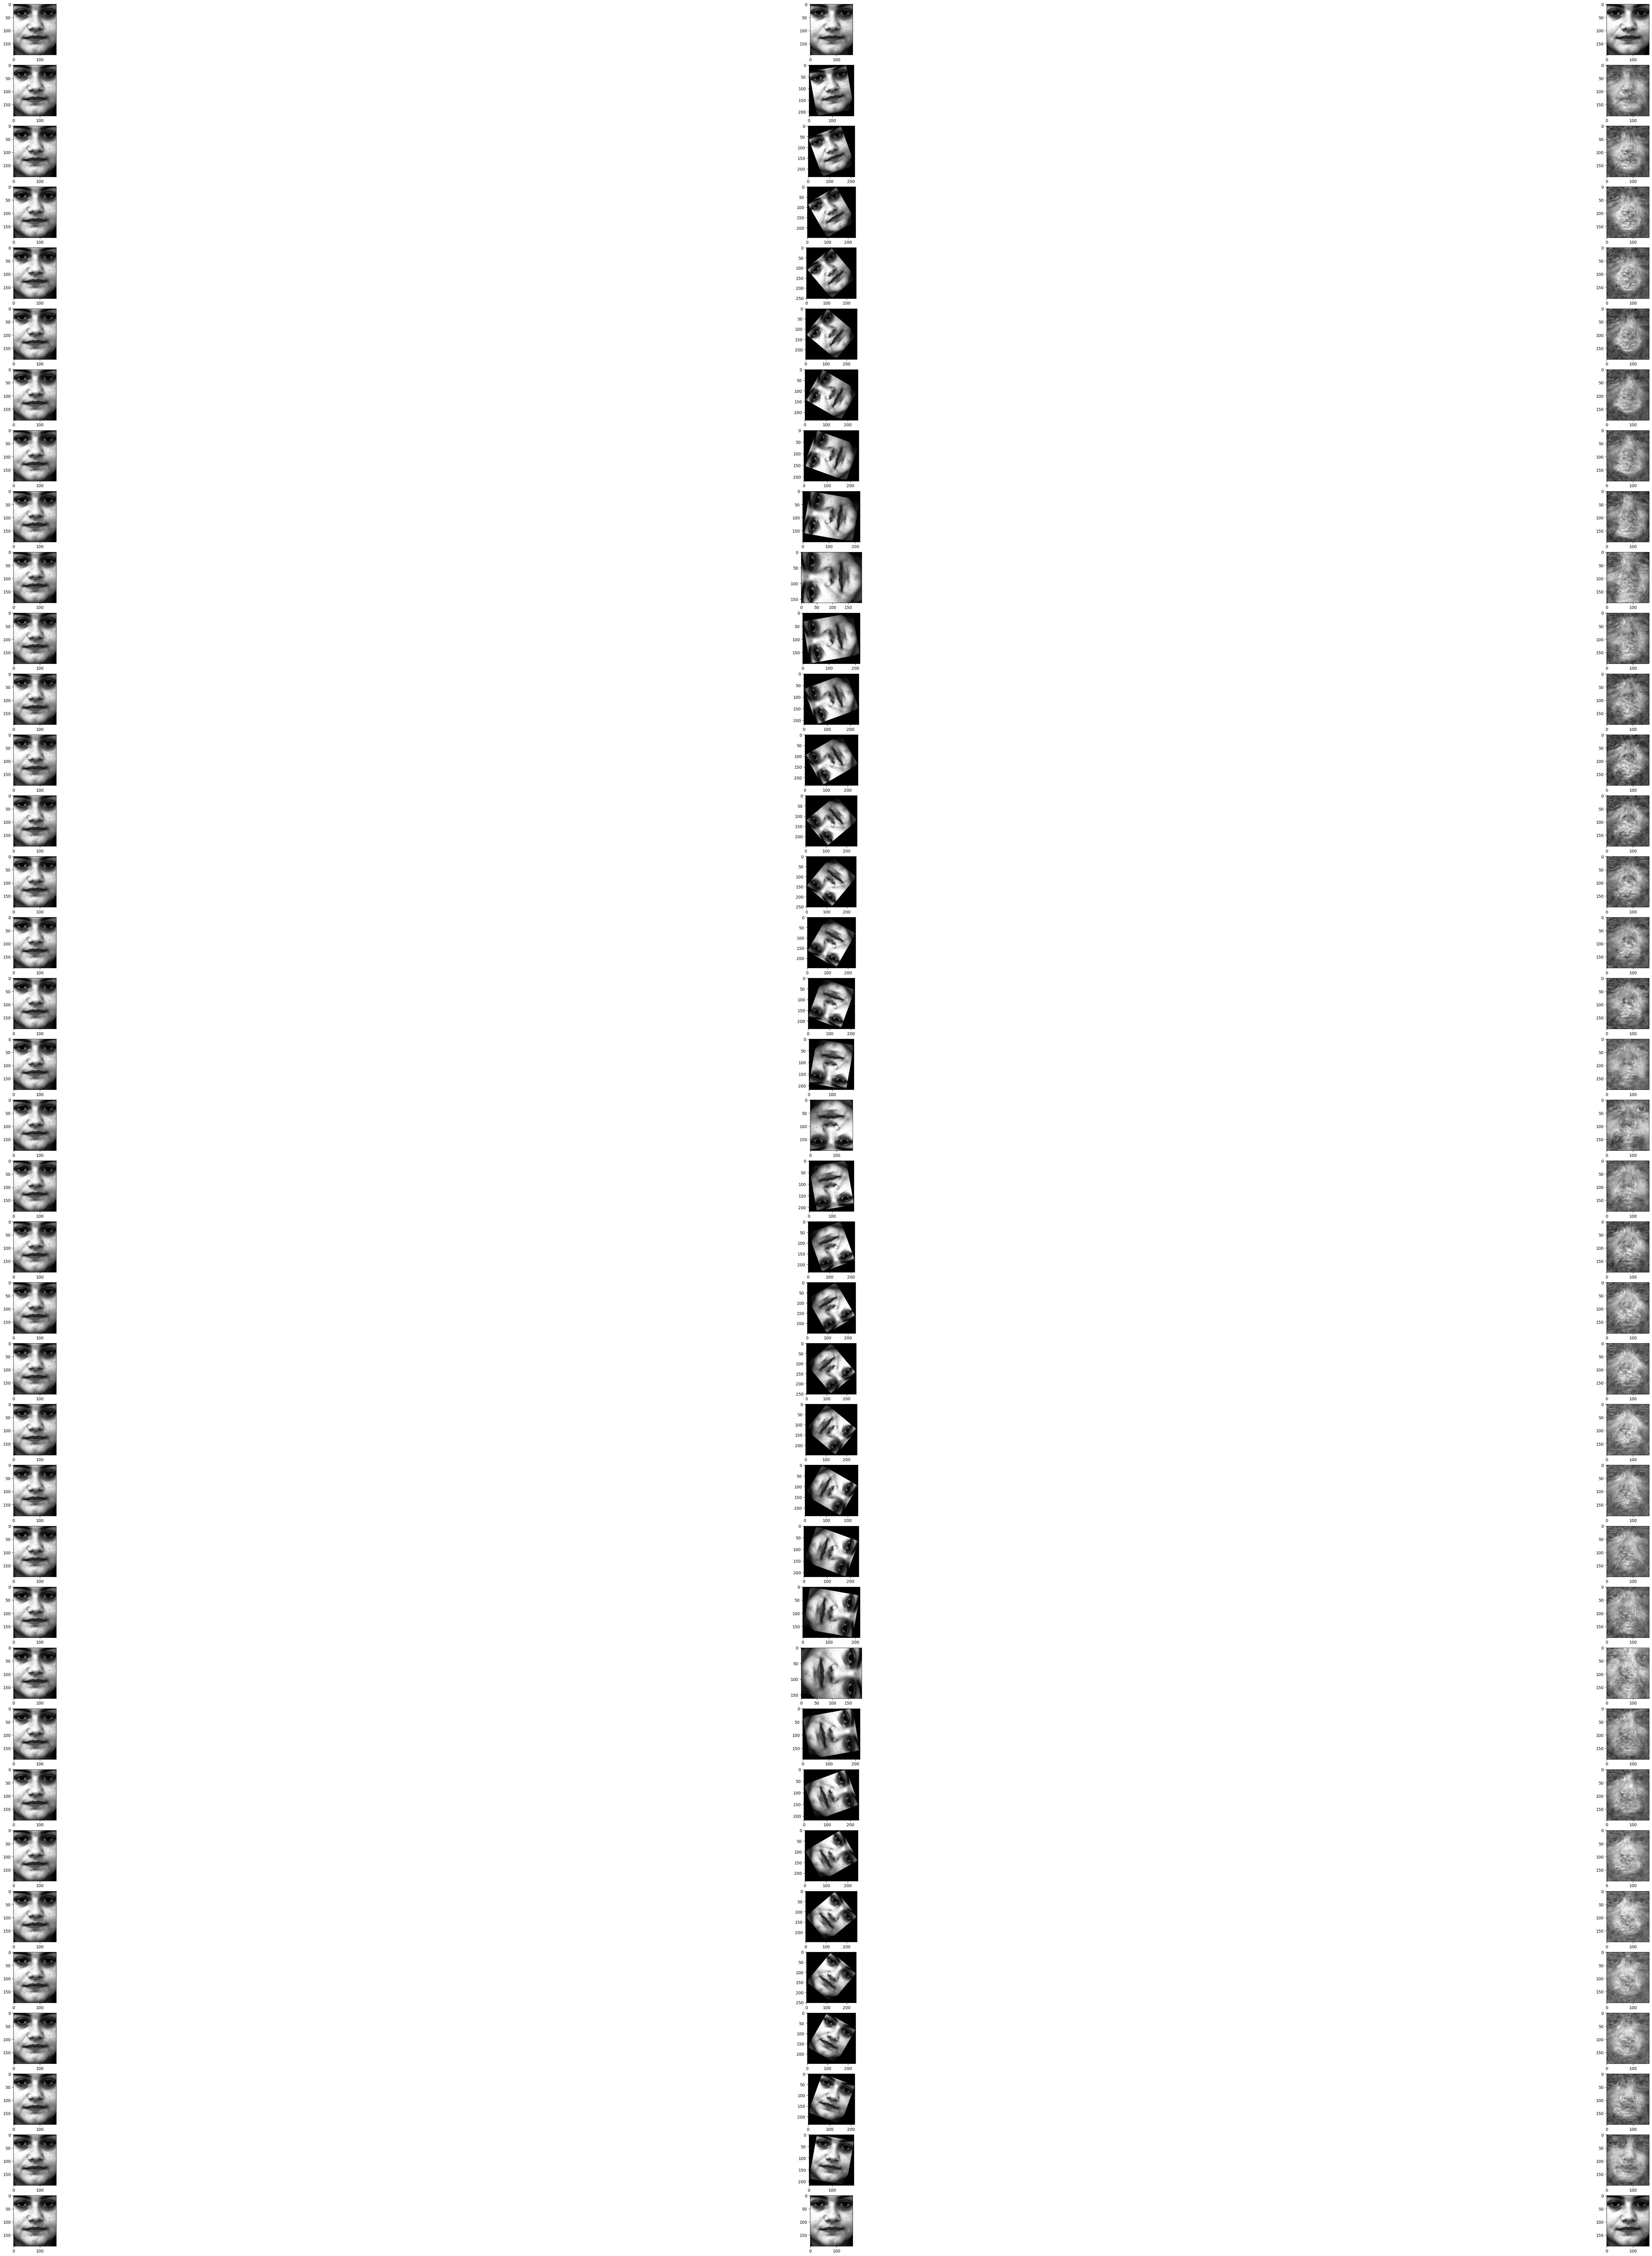

In [43]:
import scipy

file_list = os.listdir(test_folder)
i=random.randint(1,190)
image_path = os.path.join(test_folder, file_list[i])
image = cv2.imread(image_path)
image1=image[:,:,0].copy()

mse_vec=[]
K=189
U=vecs1_n[:,0:K]
loc=0
plt.figure(figsize=(100,100)) 
for rot in range(0,37):
    loc+=1
    ax=plt.subplot(37,3,loc)
    
    #plt.figure(figsize=(3,3))
    plt.imshow(image1,cmap="gray")
    image2=scipy.ndimage.rotate(image1, rot*10, axes=(1, 0))
    loc+=1
    ax=plt.subplot(37,3,loc)
    #plt.figure(figsize=(3,3))
    plt.imshow(image2,cmap="gray")
    #print(image2.shape)
    image3=cv2.resize(image2,(width1,height1))
    orig=image3.reshape((image3.shape[0]*image3.shape[1]))
    
    recon, mse=reconstruct_image(orig, U)
    new1 = np.reshape(recon, (height1, width1))
    loc+=1
    ax=plt.subplot(37,3,loc)
    #plt.figure(figsize=(3,3))
    plt.imshow(new1,cmap="gray")
    mse_vec.append(mse)



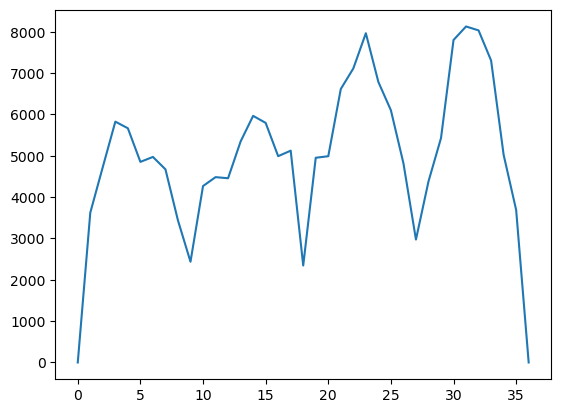

In [44]:
plt.plot(mse_vec)

نتیجه گیری:میزان خطا میانگین مربعات  به ازای 0 و 360 درجه چرخش برابر صفر می باشد. در چرخش 90، 180، و 270 درجه نیز میزان خطا کمتر شده است. 